
შეიყვანე რიცხვი:
1 - ცხრილში მოძებნა
2 - ცხრილში დამატება
3 - ცხრილიდან ამოშლა
4 - დიაგრამების ჩვენება
0 - გამოსვლა


თქვენი არჩევანი:  4


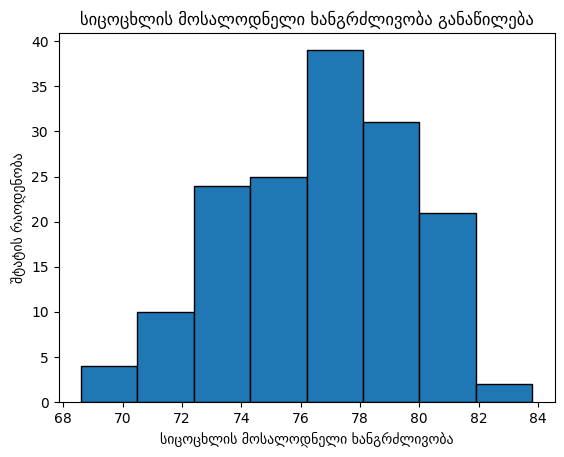

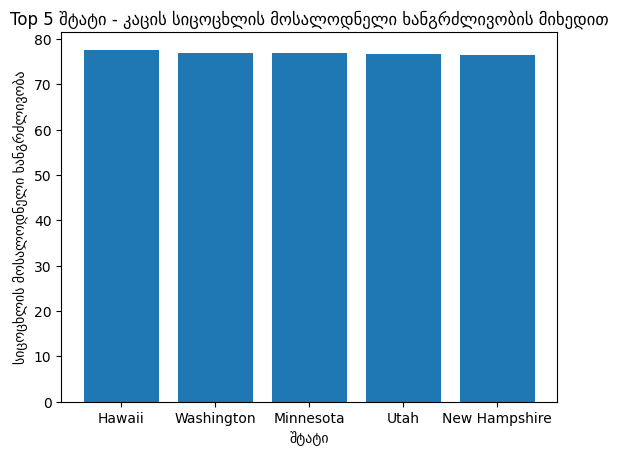

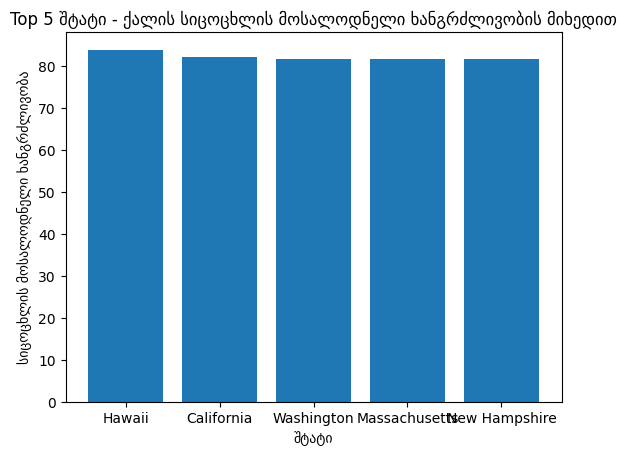


შეიყვანე რიცხვი:
1 - ცხრილში მოძებნა
2 - ცხრილში დამატება
3 - ცხრილიდან ამოშლა
4 - დიაგრამების ჩვენება
0 - გამოსვლა


თქვენი არჩევანი:  0


In [2]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

conn = sqlite3.connect("Ages.sqlite3")
cursor = conn.cursor()

# მონაცემთა ბაზაში ეძებს მომხმარებლის მიერ შეყვანილ შტატზე ინფორმაციას და fetchone - ის გამოყენებით გამოაქვს ამ შტატზე ინფორმაციას.
def search():
    state = input("შეიყვანეთ შტატის სახელი: ")
    cursor.execute("SELECT * FROM ages WHERE State = ?", (state,))
    result = cursor.fetchone()
    if result:
        print(result)
    else:
        print("შტატი მასეთი სახელით ვერ მოიძებნა")

# მონაცემთა ბაზაში ამატებს ახალ ჩანაწერს მომხმარებლის მიერ შეყვანილი ინფორმაციის მიხედვით, 
# მომხმარებელმა უნდა შეიყანოს State(შტატი)-Sex(სქესი)-LE(სიცოხლის მოსალოდნელი ხანგრძლივობა)-SE(სტანდარული გადახრა)-Quartile(კვარტალი). 
def add():
    state = input("სახელი: ")
    sex = input("სქესი: ")
    le = input("სიცოცხლის მოსალოდნელი ხანგრძლივობა: ")
    se = input("სტანდარტული გადახრა: ")
    quartile = input("კვარტილი: ")

    cursor.execute(
        "INSERT INTO ages (State, Sex, LE, SE, Quartile) VALUES (?, ?, ?, ?, ?)",
        (state, sex, le, se, quartile)
    )
    conn.commit()   # გაანახლებს ჩანაწერებს
    print("მონაცემი წარმატებით დაემატა")

# მონაცემთა ბაზიდან შლის ჩანაწერს, მომხმარებელს შეყავს შტატის სახელი და ამ შტატზე იშლება ინფორმაცია.
def remove():
    state = input("შეიყვანეთ წასაშლელი შტატის სახელი: ")
    cursor.execute("DELETE FROM ages WHERE State = ?", (state,))
    conn.commit()
    print(f"{cursor.rowcount} შტატზე ინფორმაცია წარმატებით წაიშალა")

def display_charts():
    df = pd.read_sql_query("SELECT * FROM ages", conn)
    df["LE"] = pd.to_numeric(df["LE"])

    # გვიჩვენებს ჰისტოგრამას სიცოცხლის მოსალოდნელი ხანგრძლივობის განაწილებაზე
    # x - ღერძზე სიცოცხლის მოსალოდნელი ხანგრძლივობა (წლებში)
    # y - ღერძზე შტატის რაოდენობა

    plt.hist(df["LE"].dropna(), bins=8, edgecolor='black')
    plt.title("სიცოცხლის მოსალოდნელი ხანგრძლივობა განაწილება")
    plt.xlabel("სიცოცხლის მოსალოდნელი ხანგრძლივობა")
    plt.ylabel("შტატის რაოდენობა")
    plt.show()

    # გვიჩვენებს დიაგრამას როემლზეც გამოსახულია 5 შტატი ყველაზე მაღალი სიცოცხლის მოსალოდნელი ხანგრძლივობით კაცებში
    top_5_male = df[df["Sex"] == "Male"].sort_values(by="LE", ascending=False).head(5)
    plt.bar(top_5_male["State"], top_5_male["LE"])
    plt.title("Top 5 შტატი - კაცის სიცოცხლის მოსალოდნელი ხანგრძლივობის მიხედით")
    plt.xlabel("შტატი")
    plt.ylabel("სიცოცხლის მოსალოდნელი ხანგრძლივობა")
    plt.show()

    # გვიჩვენებს დიაგრამას როემლზეც გამოსახულია 5 შტატი ყველაზე მაღალი სიცოცხლის მოსალოდნელი ხანგრძლივობით ქალებში
    top_5_female = df[df["Sex"] == "Female"].sort_values(by="LE", ascending=False).head(5)
    plt.bar(top_5_female["State"], top_5_female["LE"])
    plt.title("Top 5 შტატი - ქალის სიცოცხლის მოსალოდნელი ხანგრძლივობის მიხედით")
    plt.xlabel("შტატი")
    plt.ylabel("სიცოცხლის მოსალოდნელი ხანგრძლივობა")
    plt.show()

while True:
    print("\nშეიყვანე რიცხვი:")
    print("1 - ცხრილში მოძებნა")
    print("2 - ცხრილში დამატება")
    print("3 - ცხრილიდან ამოშლა")
    print("4 - დიაგრამების ჩვენება")
    print("0 - გამოსვლა")
    cmd = input("თქვენი არჩევანი: ")

    if cmd == "1":
        search()
    elif cmd == "2":
        add()
    elif cmd == "3":
        remove()
    elif cmd == "4":
        display_charts()
    elif cmd == "0":
        break
    else:
        print("არასწორი არჩევანი, აირჩიე 0, 1, 2, 3 ან 4")

conn.close()